In [1]:
import random
import matplotlib.pyplot as plt

def left_turn1(p1,p2,p3):
    x1,y1 = p1
    x2,y2 = p2
    x3,y3 = p3
    return x1*(y2-y3)+x2*(y3-y1)+x3*(y1-y2) >= 0
def left_turn2(p1,p2,p3):
    x1,y1 = p1
    x2,y2 = p2
    x3,y3 = p3
    return x1*y2-x1*y3+x2*y3-x2*y1+x3*y1-x3*y2 >= 0
def left_turn3(p1,p2,p3):
    x1,y1 = p1
    x2,y2 = p2
    x3,y3 = p3
    return x1*y2+x2*y3+x3*y1-x1*y3-x2*y1-x3*y2 >= 0

def poly_test(n):
    x,y = 0,0
    resx = []
    resy = []
    for i in range(n):
        x += random.uniform(0, 1)
        y = x**2 #<-- also a source of error
        resx.append(x)
        resy.append(y)
    return resx,resy

def left_turn_test(left_turn,xvals,yvals,n):
    #xvals,yvals = poly_test(n)
    errors = 0
    for i in range(n-3):
        if not left_turn( (xvals[i],yvals[i]),(xvals[i+1],yvals[i+1]),(xvals[i+2],yvals[i+2]) ):
            errors += 1
    print(errors,"errors")

n = 1000000
xvals,yvals = poly_test(n)
left_turn_test(left_turn1,xvals,yvals,n)
left_turn_test(left_turn2,xvals,yvals,n)
left_turn_test(left_turn3,xvals,yvals,n)

29 errors
141900 errors
281546 errors


In [2]:
def float_test():
    n = 1
    while 10**(-n) != 10**(-(n+1)):
        n += 1
    print("done",n)
float_test()

done 324


In [3]:
#setup: f1 = m1*2^x1, f2 = m2*2^x2, mi 24 bits, xi 8 bits
#q1: how many bits for f1*f2?
#A1: f1f2 = m1m2*2^(x1+x2), 47 and 9 (sign bit)
#q2: how many bits for f1+f2?
#A2: f1+f2 = m1 2^x1 + m2 2^x2
#2**(23+128) = 2**(151) largest number
#2**(-128) smallest number
#279 in total

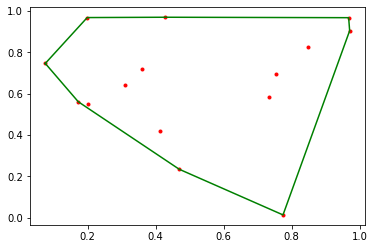

In [4]:
import random

def convex_hull(pointss):
    points = sorted(pointss)
    upper = points[0:2]
    for p in points[2:]:
        while len(upper)>=2 and left_turn1(upper[-2], upper[-1], p):
            upper.pop()
        upper.append(p)
    points.reverse()
    lower = points[0:2]
    for p in points[2:]:
        while len(lower)>=2 and left_turn1(lower[-2], lower[-1], p):
            lower.pop()
        lower.append(p)
    return upper + lower

def plot(random_points,ch):
    plt.plot(*list(zip(*random_points)),"r.")
    plt.plot(*list(zip(*ch)),"g-")

n = 15
random_points = [ (random.uniform(0, 1),random.uniform(0, 1)) for i in range(n) ]
ch = convex_hull(random_points)
plot(random_points,ch)

22


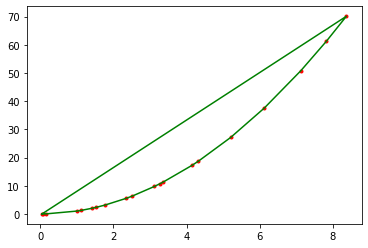

In [5]:
n = 20
x,y = poly_test(n)
random_points = list(zip(x,y))
ch = convex_hull(random_points)
plot(random_points,ch)
print(len(ch))

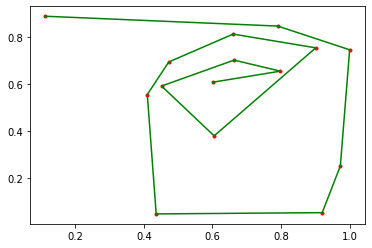

In [16]:
def sidedness(p1,p2,q):
    x1,y1 = p1
    x2,y2 = p2
    x3,y3 = q
    side = x1*(y2-y3)+x2*(y3-y1)+x3*(y1-y2)
    if side > 0:
        return 1
    elif side == 0:
        return side
    else:
        return -1

def find_best_angle(points,p):
    q = points[0] if not p == points[0] else points[1] 
    for potential_q in points:
        side = sidedness(p,q,potential_q)
        if side == 1 or (side == 0 and q < potential_q):
            q = potential_q
    return q

from copy import deepcopy
def GIFT_CH(pts):
    points = deepcopy(pts)
    p_left = min(points)
    points.remove(p_left)
    CH = [p_left]
    q = points[0]
    while not p_left == q:
        for z in points:
            if z == q or z == p_left:
                continue
            if not left_turn1(p_left,z,q):
                q = z
        CH.append(q)
        points.remove(q)
        p_left = q
        if points:
            q = points[0]
    return CH
        
n = 15
random_points = [ (random.uniform(0, 1),random.uniform(0, 1)) for i in range(n) ]
ch = GIFT_CH(random_points)
plot(random_points,ch)